# Task 1

In this notebook I will show my development of the game described in task 1

In [1]:
#Allows me to import the modules in the src folder
#Code from https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

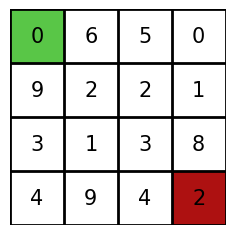

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.grid import Grid

grid = Grid(4, 4, 123)
grid.display_grid([])

In [3]:
random_path = grid.random_path()
baseline_path = grid.custom_path()
dijkstra_path = grid.dijkstra_path()

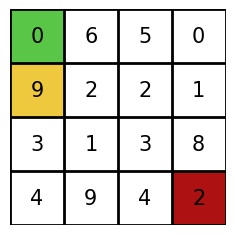

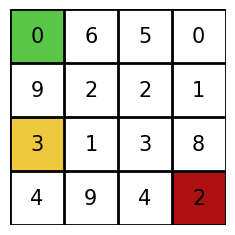

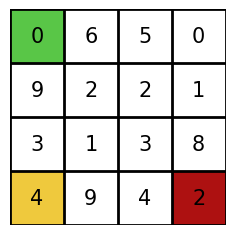

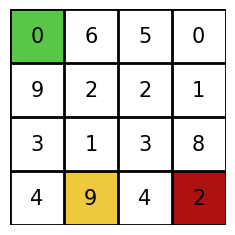

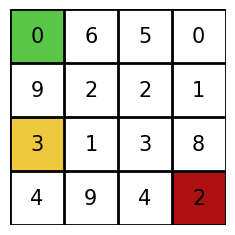

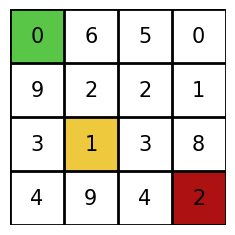

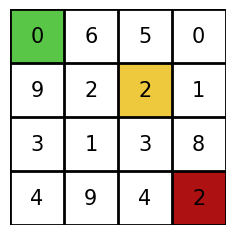

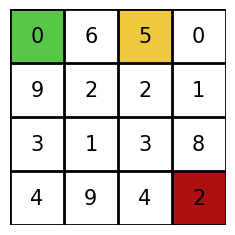

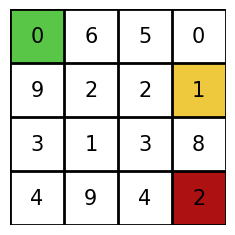

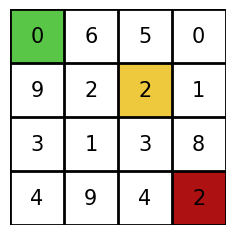

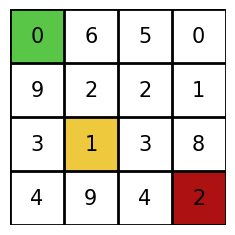

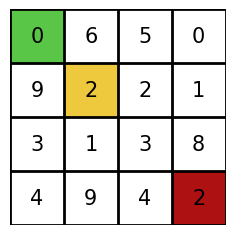

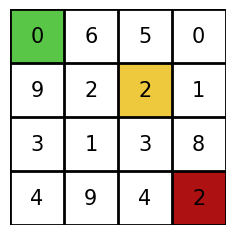

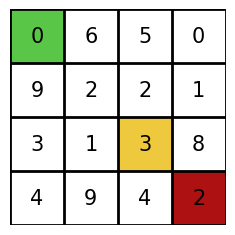

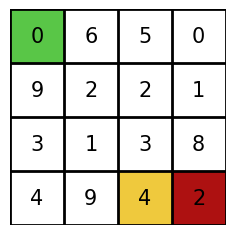

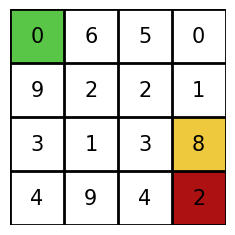

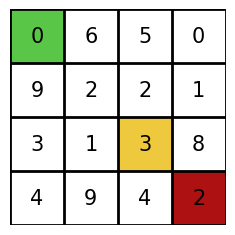

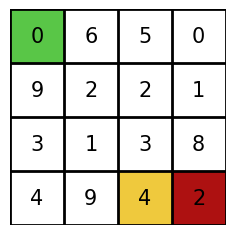

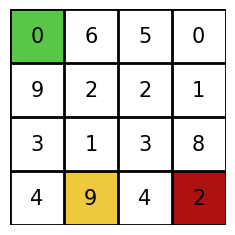

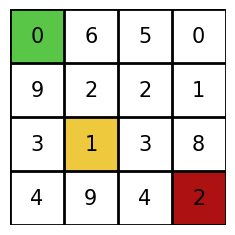

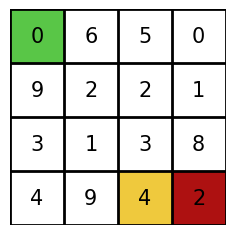

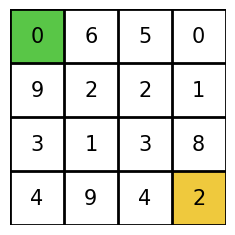

In [4]:
grid.traverse_path(random_path)

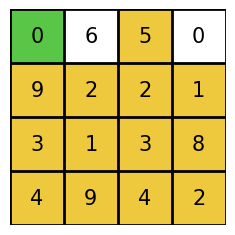

In [5]:
grid.display_grid(random_path)

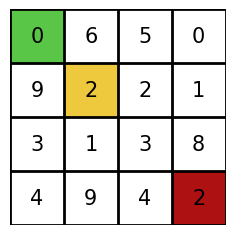

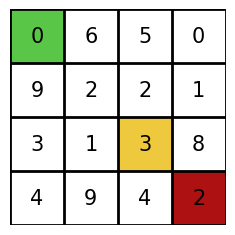

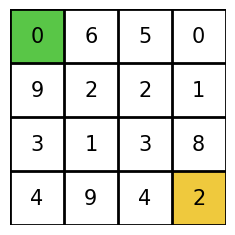

In [6]:
grid.traverse_path(baseline_path)

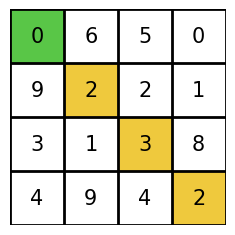

In [7]:
grid.display_grid(baseline_path)

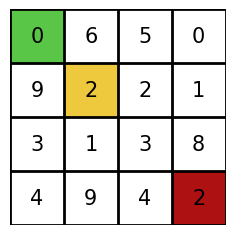

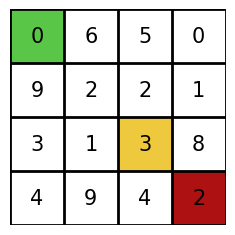

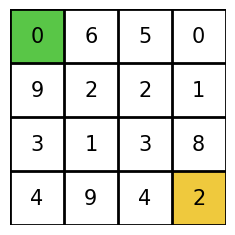

In [8]:
grid.traverse_path(dijkstra_path)

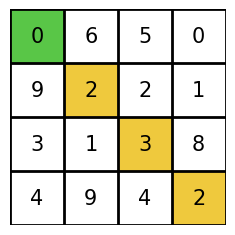

In [9]:
grid.display_grid(dijkstra_path)

In [10]:
grid.get_path_length(random_path)

82

In [11]:
grid.get_path_length(baseline_path)

7

In [12]:
grid.get_path_length(dijkstra_path)

7

In [13]:
plt.figure(figsize=(13, 7))

path_lengths = pd.DataFrame(columns=["Random path", "Baseline path", "Dijkstra path"])

for i in range(100):
    seed = i
    grid = Grid(4, 4, seed)
    path_lengths.loc[path_lengths.index.size] = [grid.get_path_length(grid.random_path()), 
                                                 grid.get_path_length(grid.custom_path()),
                                                 grid.get_path_length(grid.dijkstra_path())]

<Figure size 1300x700 with 0 Axes>

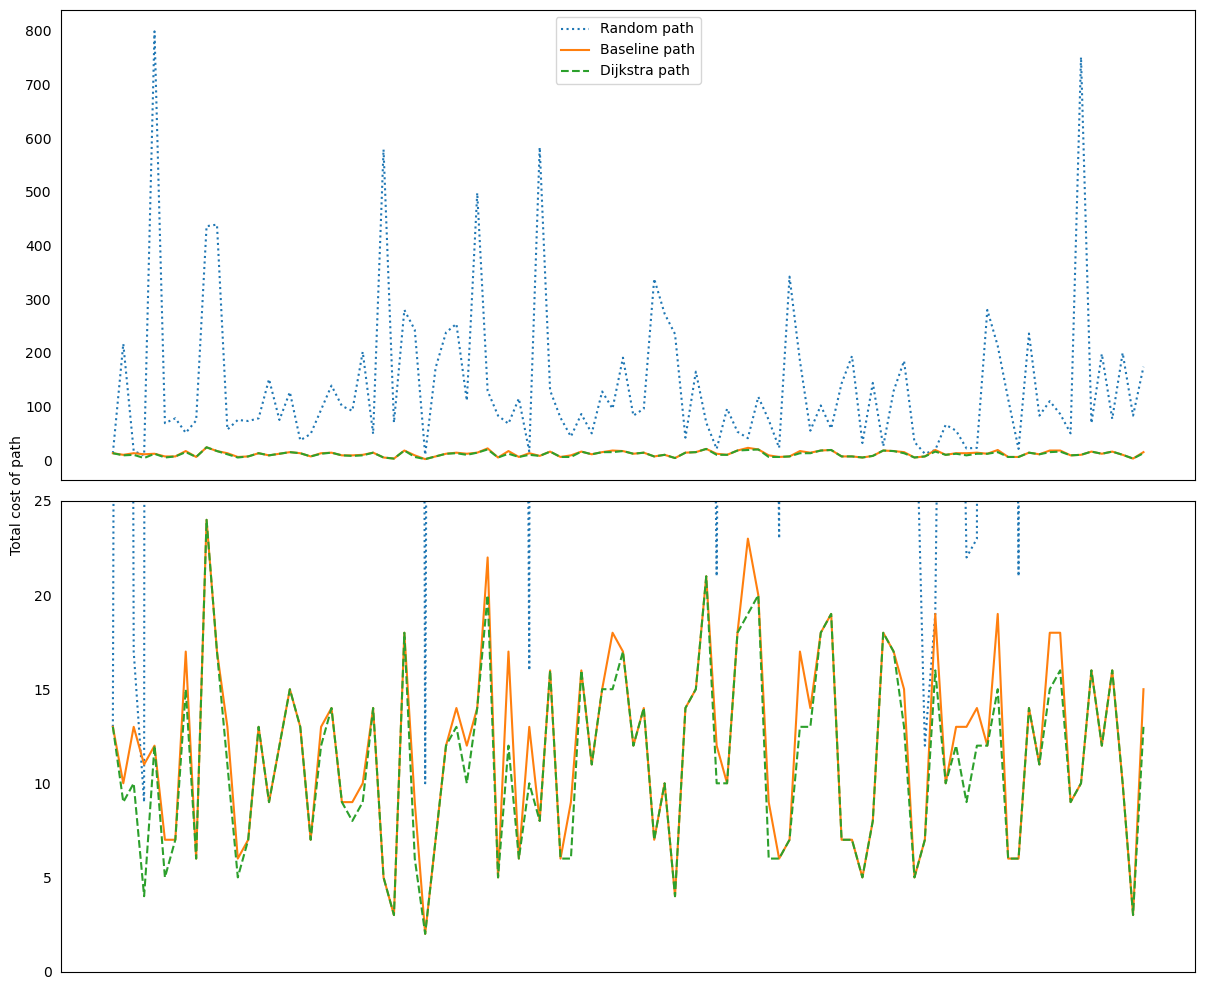

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(path_lengths["Random path"], ls=':', label='Random path')
ax1.plot(path_lengths["Baseline path"], ls='-', label='Baseline path')
ax1.plot(path_lengths["Dijkstra path"], ls='--', label='Dijkstra path')

ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

ax1.legend()

ax2.plot(path_lengths["Random path"], ls=':', label='Random path')
ax2.plot(path_lengths["Baseline path"], ls='-', label='Baseline path')
ax2.plot(path_lengths["Dijkstra path"], ls='--', label='Dijkstra path')

ax2.set_xticklabels([])
ax2.tick_params(tick1On=False)

ax2.set_ylim(0, 25)

fig.text(0, 0.5, "Total cost of path", va='center', rotation='vertical')
plt.tight_layout() 

In [15]:
path_lengths.describe()

,Random path,Baseline path,Dijkstra path
count,100.000000,100.000000,100.000000
mean,141.550000,11.990000,11.190000
std,147.734021,4.885549,4.681136
min,9.000000,2.000000,2.000000
25%,54.500000,7.750000,7.000000
50%,89.000000,12.000000,11.500000
75%,185.000000,15.250000,15.000000
max,799.000000,24.000000,24.000000


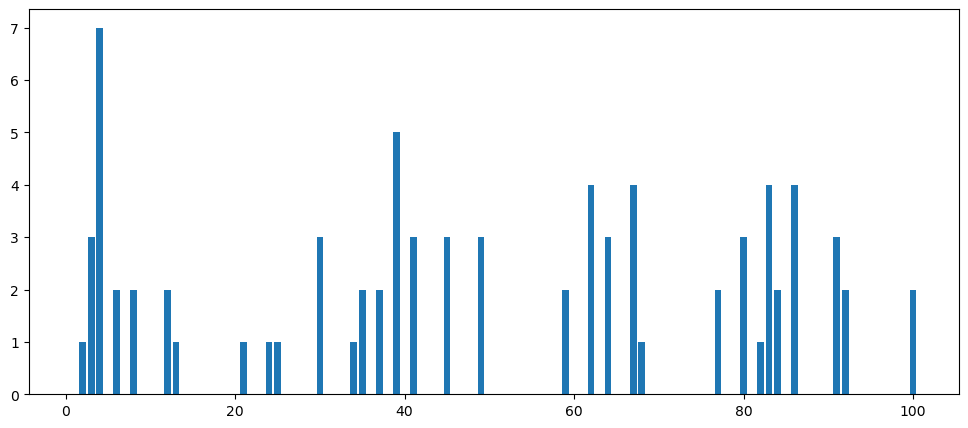

In [16]:
plt.figure(figsize=(12, 5))

plt.bar(np.arange(1,101), np.subtract(path_lengths["Baseline path"], path_lengths["Dijkstra path"]))

plt.show()

In [17]:
path_lengths.describe()

,Random path,Baseline path,Dijkstra path
count,100.000000,100.000000,100.000000
mean,141.550000,11.990000,11.190000
std,147.734021,4.885549,4.681136
min,9.000000,2.000000,2.000000
25%,54.500000,7.750000,7.000000
50%,89.000000,12.000000,11.500000
75%,185.000000,15.250000,15.000000
max,799.000000,24.000000,24.000000


In [18]:
plt.figure(figsize=(13, 7))

path_lengths = pd.DataFrame(columns=["Random path", "Baseline path", "Dijkstra path"])

for i in range(100):
    seed = i
    grid = Grid(8, 8, seed)
    path_lengths.loc[path_lengths.index.size] = [grid.get_path_length(grid.random_path()), 
                                                 grid.get_path_length(grid.custom_path()),
                                                 grid.get_path_length(grid.dijkstra_path())]

<Figure size 1300x700 with 0 Axes>

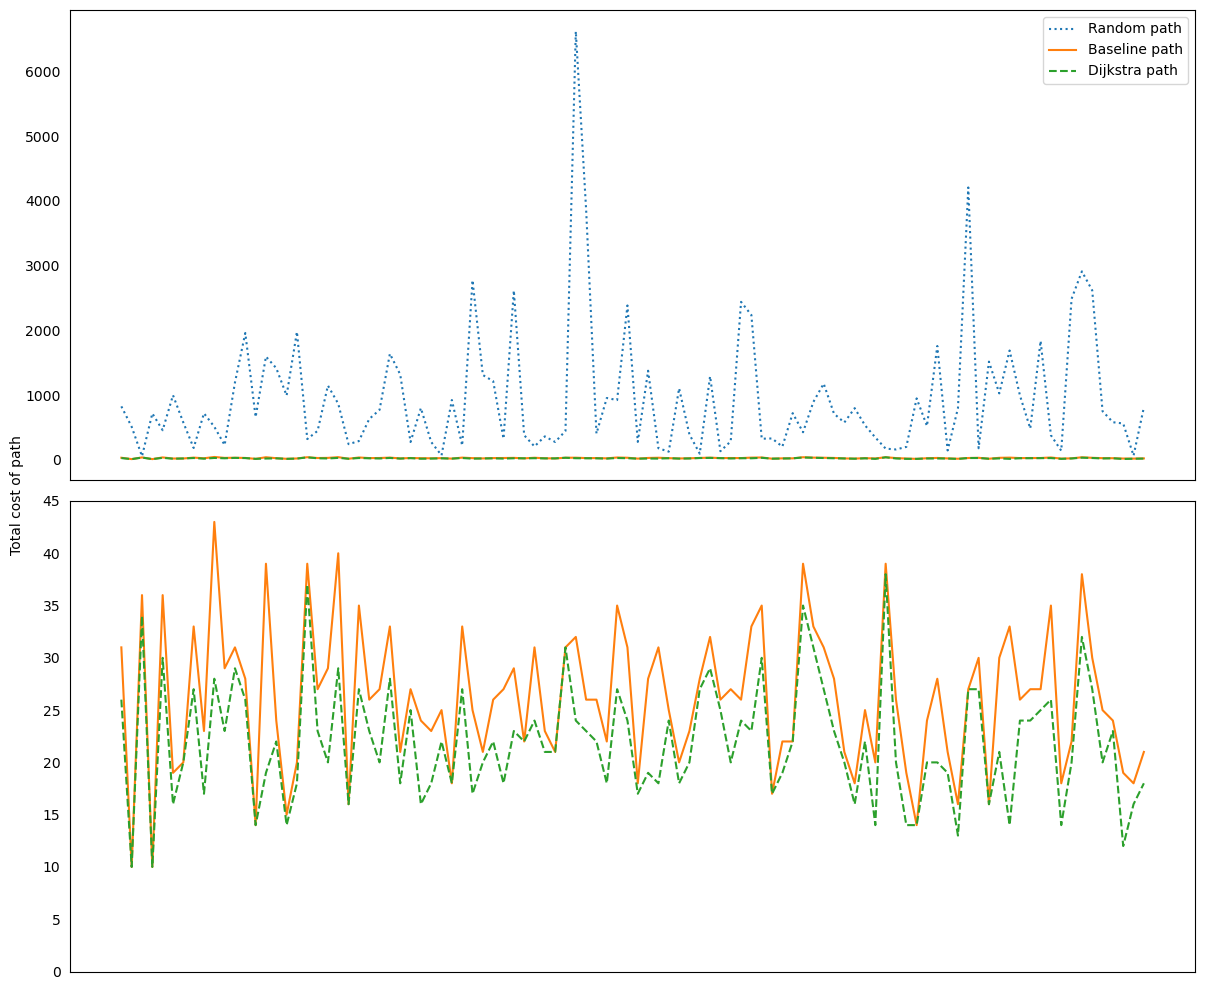

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(path_lengths["Random path"], ls=':', label='Random path')
ax1.plot(path_lengths["Baseline path"], ls='-', label='Baseline path')
ax1.plot(path_lengths["Dijkstra path"], ls='--', label='Dijkstra path')

ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

ax1.legend()

ax2.plot(path_lengths["Random path"], ls=':', label='Random path')
ax2.plot(path_lengths["Baseline path"], ls='-', label='Baseline path')
ax2.plot(path_lengths["Dijkstra path"], ls='--', label='Dijkstra path')

ax2.set_xticklabels([])
ax2.tick_params(tick1On=False)

ax2.set_ylim(0, 45)

fig.text(0, 0.5, "Total cost of path", va='center', rotation='vertical')
plt.tight_layout() 

In [20]:
path_lengths.describe()

,Random path,Baseline path,Dijkstra path
count,100.000000,100.00000,100.000000
mean,956.940000,26.13000,21.910000
std,1004.417222,6.86913,5.687298
min,54.000000,10.00000,10.000000
25%,312.250000,21.00000,18.000000
50%,685.000000,26.00000,22.000000
75%,1199.000000,31.00000,26.000000
max,6617.000000,43.00000,38.000000


In [21]:
path_data = pd.DataFrame(columns=["Grid size", "Path type", "Path length"])

random_path_data = pd.DataFrame(columns=["Grid size", "Path length"])
baseline_path_data = pd.DataFrame(columns=["Grid size", "Path length"])
dijkstra_path_data = pd.DataFrame(columns=["Grid size", "Path length"])

for i in range(2400):
    #Increase grid size by 1 every 50 iterations, ranging from 3x3 to 50x50
    grid_size = math.floor(i / 50) + 3
    seed = i
    grid = Grid(grid_size, grid_size, seed)
    path_data.loc[path_data.index.size] = [f"{grid_size}x{grid_size}", "Random path", grid.get_path_length(grid.random_path())] 
    path_data.loc[path_data.index.size] = [f"{grid_size}x{grid_size}", "Baseline path", grid.get_path_length(grid.custom_path())] 
    path_data.loc[path_data.index.size] = [f"{grid_size}x{grid_size}", "Dijkstra path", grid.get_path_length(grid.dijkstra_path())]
    
    random_path_data.loc[random_path_data.index.size] = [f"{grid_size}x{grid_size}", grid.get_path_length(grid.random_path())] 
    baseline_path_data.loc[baseline_path_data.index.size] = [f"{grid_size}x{grid_size}", grid.get_path_length(grid.custom_path())] 
    dijkstra_path_data.loc[dijkstra_path_data.index.size] = [f"{grid_size}x{grid_size}", grid.get_path_length(grid.dijkstra_path())]
    

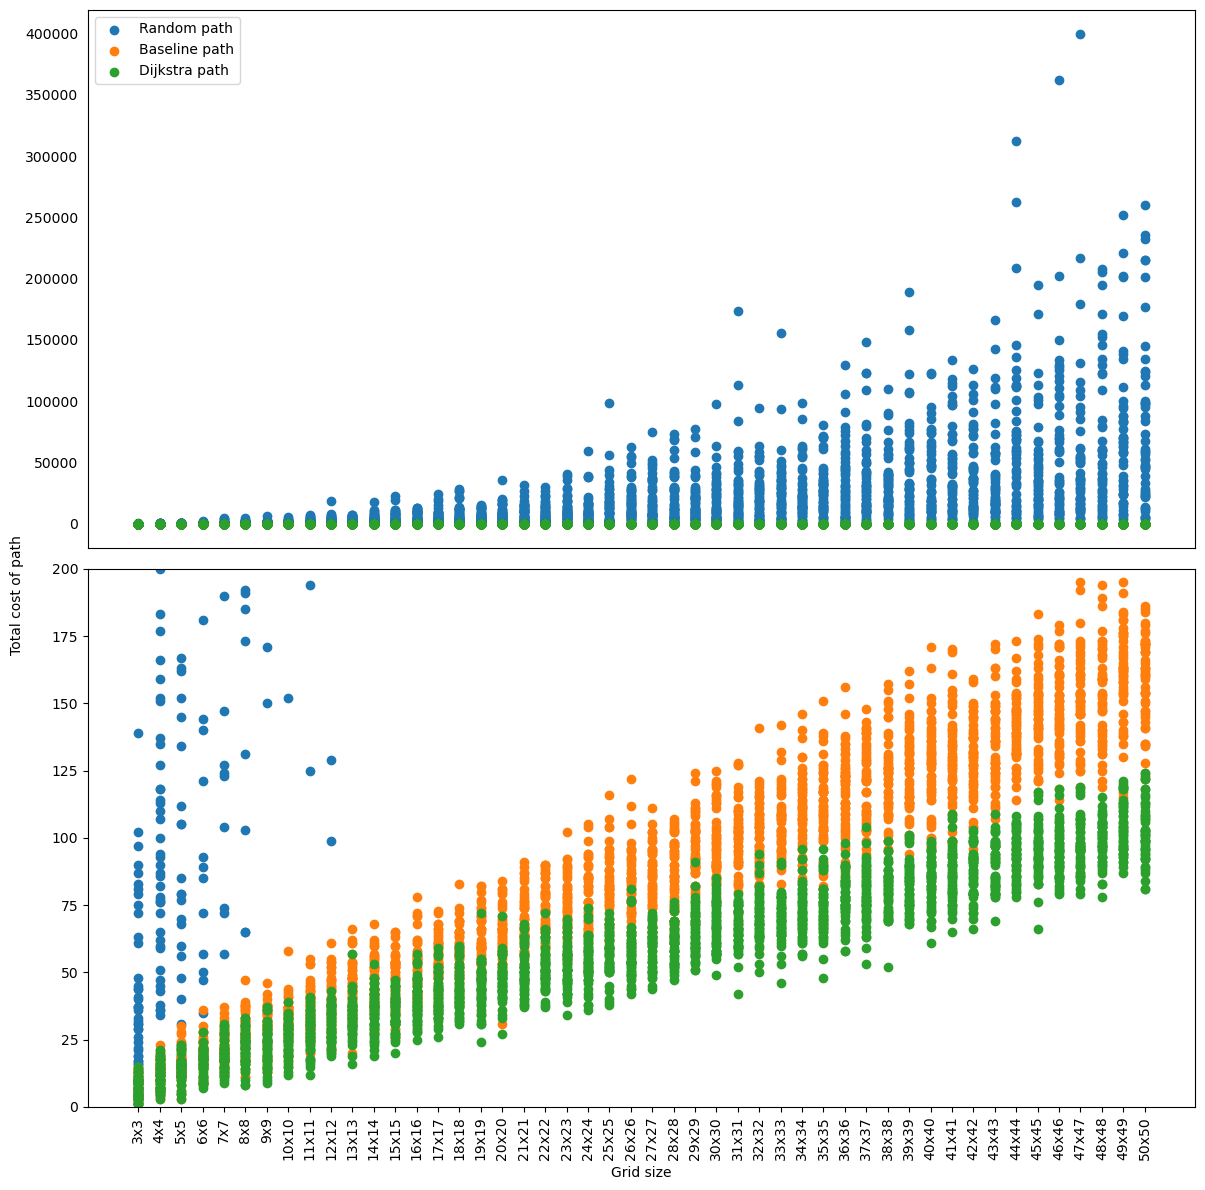

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

ax1.scatter(random_path_data["Grid size"], random_path_data["Path length"], label='Random path')
ax1.scatter(baseline_path_data["Grid size"], baseline_path_data["Path length"], label='Baseline path')
ax1.scatter(dijkstra_path_data["Grid size"], dijkstra_path_data["Path length"], label='Dijkstra path')

ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

ax1.legend()

ax2.scatter(random_path_data["Grid size"], random_path_data["Path length"], label='Random path')
ax2.scatter(baseline_path_data["Grid size"], baseline_path_data["Path length"], label='Baseline path')
ax2.scatter(dijkstra_path_data["Grid size"], dijkstra_path_data["Path length"], label='Dijkstra path')

ax2.tick_params(axis='x', labelrotation=90)

ax2.set_xlabel("Grid size")
ax2.set_ylim(0, 200)

fig.text(0, 0.5, "Total cost of path", va='center', rotation='vertical')
plt.tight_layout() 

In [23]:
#Group by grid size
grouped_random_path_data = random_path_data.groupby("Grid size").mean().reset_index()

#Map grid size to integers and sort it
replace = {}
for i in range(3,51):
    grid = f"{i}x{i}"
    replace[grid] = i
    
grouped_random_path_data["Grid size"] = grouped_random_path_data["Grid size"].replace(replace)
grouped_random_path_data = grouped_random_path_data.sort_values(by=['Grid size'])

#Map integers to grid size and reset indexes
replace = {v: k for k, v in replace.items()}
grouped_random_path_data["Grid size"] = grouped_random_path_data["Grid size"].replace(replace)
grouped_random_path_data = grouped_random_path_data.reset_index(drop=True)


#Group by grid size
grouped_baseline_path_data = baseline_path_data.groupby("Grid size").mean().reset_index()

#Map grid size to integers and sort it
replace = {}
for i in range(3,51):
    grid = f"{i}x{i}"
    replace[grid] = i
    
grouped_baseline_path_data["Grid size"] = grouped_baseline_path_data["Grid size"].replace(replace)
grouped_baseline_path_data = grouped_baseline_path_data.sort_values(by=['Grid size'])

#Map integers to grid size and reset indexes
replace = {v: k for k, v in replace.items()}
grouped_baseline_path_data["Grid size"] = grouped_baseline_path_data["Grid size"].replace(replace)
grouped_baseline_path_data = grouped_baseline_path_data.reset_index(drop=True)


#Group by grid size
grouped_dijkstra_path_data = dijkstra_path_data.groupby("Grid size").mean().reset_index()

#Map grid size to integers and sort it
replace = {}
for i in range(3,51):
    grid = f"{i}x{i}"
    replace[grid] = i
    
grouped_dijkstra_path_data["Grid size"] = grouped_dijkstra_path_data["Grid size"].replace(replace)
grouped_dijkstra_path_data = grouped_dijkstra_path_data.sort_values(by=['Grid size'])

#Map integers to grid size and reset indexes
replace = {v: k for k, v in replace.items()}
grouped_dijkstra_path_data["Grid size"] = grouped_dijkstra_path_data["Grid size"].replace(replace)
grouped_dijkstra_path_data = grouped_dijkstra_path_data.reset_index(drop=True)

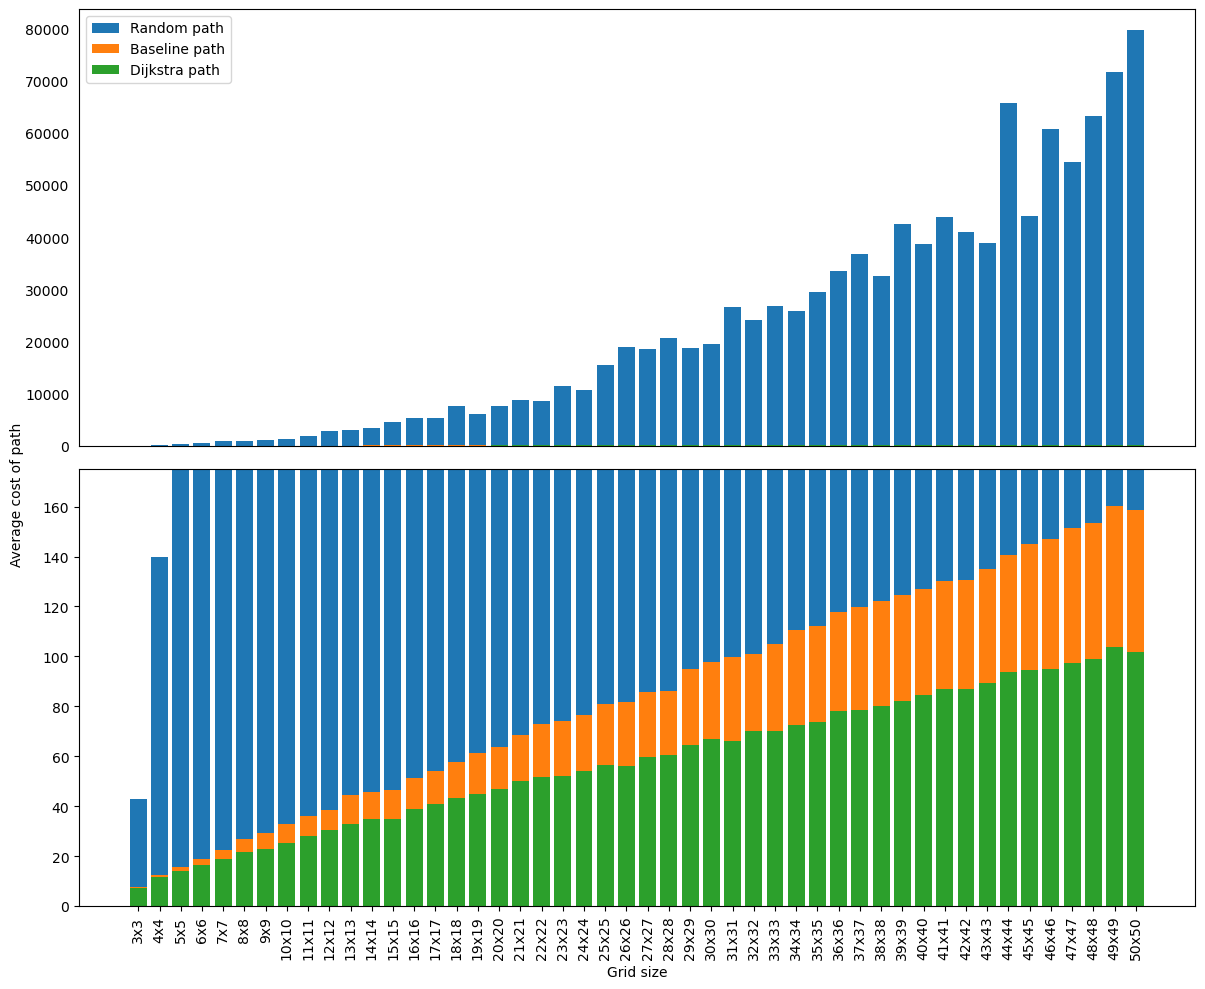

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.bar(grouped_random_path_data["Grid size"], grouped_random_path_data["Path length"], label='Random path')
ax1.bar(grouped_baseline_path_data["Grid size"], grouped_baseline_path_data["Path length"], label='Baseline path')
ax1.bar(grouped_dijkstra_path_data["Grid size"], grouped_dijkstra_path_data["Path length"], label='Dijkstra path')

ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

ax1.legend()

ax2.bar(grouped_random_path_data["Grid size"], grouped_random_path_data["Path length"], label='Random path')
ax2.bar(grouped_baseline_path_data["Grid size"], grouped_baseline_path_data["Path length"], label='Baseline path')
ax2.bar(grouped_dijkstra_path_data["Grid size"], grouped_dijkstra_path_data["Path length"], label='Dijkstra path')

ax2.tick_params(axis='x', labelrotation=90)

ax2.set_xlabel("Grid size")
ax2.set_ylim(0, 175)

fig.text(0, 0.5, "Average cost of path", va='center', rotation='vertical')
plt.tight_layout() 